In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
wednesday = pd.read_csv('../data/wednesday.csv', sep=';')

In [4]:
wednesday

,timestamp,customer_no,location
0,2019-09-04 07:00:00,1,fruit
1,2019-09-04 07:00:00,2,dairy
2,2019-09-04 07:00:00,3,fruit
3,2019-09-04 07:00:00,4,fruit
4,2019-09-04 07:00:00,5,dairy
...,...,...,...
5045,2019-09-04 21:48:00,1528,spices
5046,2019-09-04 21:49:00,1520,dairy
5047,2019-09-04 21:49:00,1529,dairy
5048,2019-09-04 21:49:00,1530,fruit


In [6]:
wednesday['timestamp']  = pd.to_datetime(wednesday['timestamp'])
wednesday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    5050 non-null   datetime64[ns]
 1   customer_no  5050 non-null   int64         
 2   location     5050 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 118.5+ KB


In [16]:
# Calculate the total number of customers in each section
total_section = wednesday.groupby('location')[['customer_no']].count().sort_values('customer_no', ascending=True)
total_section

,customer_no
location,
spices,730
drinks,775
dairy,976
fruit,1043
checkout,1526


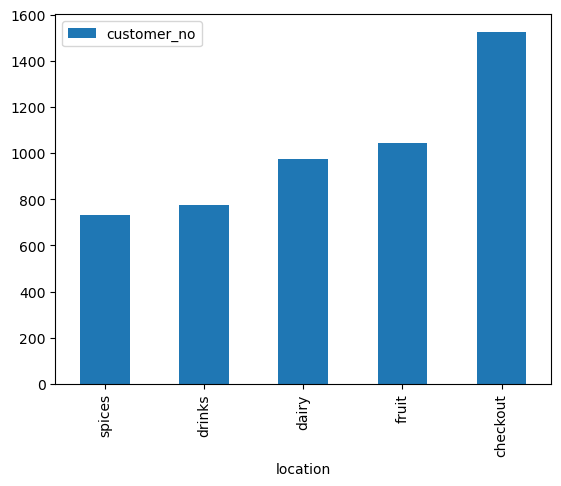

In [18]:
total_section.plot.bar();

In [23]:
# Calculate the total number of customers in each section over time
section_time = wednesday.groupby(['timestamp', 'location']).count()
section_time

customer_no
timestamp           location             
2019-09-04 07:00:00 dairy               2
                    drinks              1
                    fruit               3
2019-09-04 07:01:00 checkout            1
                    dairy               1
...                                   ...
2019-09-04 21:48:00 checkout            1
                    spices              2
2019-09-04 21:49:00 checkout            1
                    dairy               2
                    fruit               1

[2762 rows x 1 columns]

In [32]:
# Resample the time by hour
section_time = wednesday.copy()

In [33]:
section_time['hour'] = section_time['timestamp'].dt.hour

In [34]:
section_time

,timestamp,customer_no,location,hour
0,2019-09-04 07:00:00,1,fruit,7
1,2019-09-04 07:00:00,2,dairy,7
2,2019-09-04 07:00:00,3,fruit,7
3,2019-09-04 07:00:00,4,fruit,7
4,2019-09-04 07:00:00,5,dairy,7
...,...,...,...,...
5045,2019-09-04 21:48:00,1528,spices,21
5046,2019-09-04 21:49:00,1520,dairy,21
5047,2019-09-04 21:49:00,1529,dairy,21
5048,2019-09-04 21:49:00,1530,fruit,21


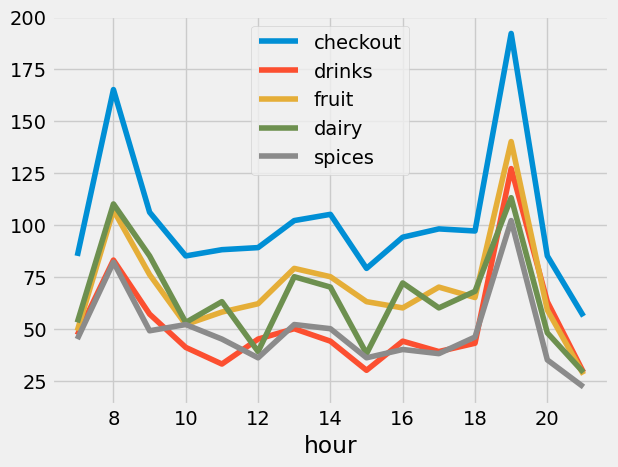

In [37]:
section_time[section_time['location'] == 'checkout'].groupby(['hour']).count().rename({'timestamp':'checkout'},axis=1)['checkout'].plot(legend=True)
section_time[section_time['location'] == 'drinks'].groupby(['hour']).count().rename({'timestamp':'drinks'},axis=1)['drinks'].plot(legend=True)
section_time[section_time['location'] == 'fruit'].groupby(['hour']).count().rename({'timestamp':'fruit'},axis=1)['fruit'].plot(legend=True)
section_time[section_time['location'] == 'dairy'].groupby(['hour']).count().rename({'timestamp':'dairy'},axis=1)['dairy'].plot(legend=True)
section_time[section_time['location'] == 'spices'].groupby(['hour']).count().rename({'timestamp':'spices'},axis=1)['spices'].plot(legend=True);

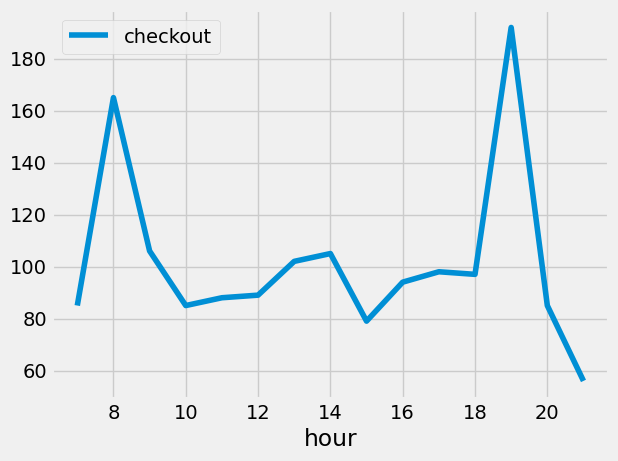

In [39]:
section_time[section_time['location'] == 'checkout'].groupby(['hour']).count().rename({'timestamp':'checkout'},axis=1)['checkout'].plot(legend=True);

In [40]:
individual_customer = wednesday['customer_no'] == 1
individual_customer

0        True
1       False
2       False
3       False
4       False
        ...  
5045    False
5046    False
5047    False
5048    False
5049    False
Name: customer_no, Length: 5050, dtype: bool

In [41]:
customer_1 = wednesday[individual_customer]
customer_1

,timestamp,customer_no,location
0,2019-09-04 07:00:00,1,fruit
9,2019-09-04 07:02:00,1,checkout


In [95]:
# Calculate the time each customer spent in the market
time_spent = wednesday.groupby(by=['customer_no'])[['timestamp']].apply(lambda x:x.max() - x.min()).rename({'timestamp':'time_spent'}, axis=1) / pd.Timedelta(minutes=1)
time_spent

,time_spent
customer_no,
1,2.0
2,6.0
3,11.0
4,3.0
5,1.0
...,...
1527,3.0
1528,3.0
1529,4.0


In [93]:
example = wednesday.groupby('customer_no').count()

In [94]:
example

,timestamp,location
customer_no,,
1,2,2
2,3,3
3,5,5
4,2,2
5,2,2
...,...,...
1527,3,3
1528,2,2
1529,3,3


In [100]:
 # Extend the dataset to get minute-based datapoints of every customer
def to_minute(df):
    """Function to resample customer data to minute steps, forward interpolating the
    location value."""
    grouper = df.set_index('timestamp').groupby('customer_no').resample('min')['location'].ffill()
    resampled_df = grouper.reset_index('timestamp')
    return resampled_df.reset_index()

In [54]:
#wednesday_minute = wednesday.set_index('timestamp')
#wednesday_sorted = wednesday_minute.sort_values('customer_no')
#grouper = wednesday_sorted.groupby([pd.Grouper(freq='min'), 'customer_no'])
#grouper_2 = wednesday_sorted.groupby('customer_no').resample('min')['location'].ffill()
#customer_minute = grouper_2.reset_index('timestamp')

In [101]:
to_minute(wednesday)

,customer_no,timestamp,location
0,1,2019-09-04 07:00:00,fruit
1,1,2019-09-04 07:01:00,fruit
2,1,2019-09-04 07:02:00,checkout
3,2,2019-09-04 07:00:00,dairy
4,2,2019-09-04 07:01:00,dairy
...,...,...,...
10826,1530,2019-09-04 21:49:00,fruit
10827,1531,2019-09-04 21:46:00,drinks
10828,1531,2019-09-04 21:47:00,drinks
10829,1531,2019-09-04 21:48:00,drinks


In [105]:
time_grouper = wednesday.set_index('timestamp')

In [114]:
time_grouper.groupby('customer_no').first()

,location
customer_no,
1,fruit
2,dairy
3,fruit
4,fruit
5,dairy
...,...
1527,dairy
1528,drinks
1529,spices


In [ ]:
def gen_entrance(df):
    